**FitFuel – Linear Regression with SHAP Analysis**

Linear Model: y = 97.86 + 27.86 * Influencer_Posts
Baseline (mean Bottles Sold): 148.00

Results Table:
   Influencer_Posts  Bottles_Sold   Predicted  SHAP_Value  Baseline + SHAP  \
0                 1           120  125.714286  -22.285714       125.714286   
1                 2           150  153.571429    5.571429       153.571429   
2                 3           180  181.428571   33.428571       181.428571   
3                 1           130  125.714286  -22.285714       125.714286   
4                 2           160  153.571429    5.571429       153.571429   

   Check  
0   True  
1   True  
2   True  
3   True  
4   True  


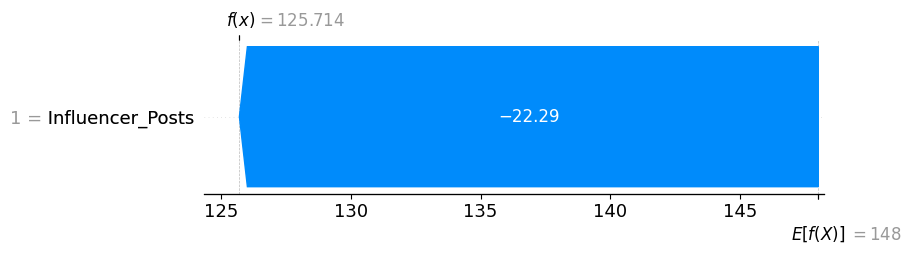

Row 1: Overpredicted — 1 posts shifted prediction by -22.29 bottles from baseline.
Row 2: Overpredicted — 2 posts shifted prediction by 5.57 bottles from baseline.
Row 3: Overpredicted — 3 posts shifted prediction by 33.43 bottles from baseline.
Row 4: Underpredicted — 1 posts shifted prediction by -22.29 bottles from baseline.
Row 5: Underpredicted — 2 posts shifted prediction by 5.57 bottles from baseline.


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# 1 Create dataset from given problem statement
data = {
    'Influencer_Posts': [1, 2, 3, 1, 2],
    'Bottles_Sold': [120, 150, 180, 130, 160]
}
df_original = pd.DataFrame(data)

# Save to Excel
df_original.to_excel("FitFuel.xlsx", index=False)

# 2 Load dataset from Excel (as required)
df = pd.read_excel("FitFuel.xlsx")

# 3 Fit Linear Regression
X = df[['Influencer_Posts']]
y = df['Bottles_Sold']
model = LinearRegression()
model.fit(X, y)

# Model coefficients
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear Model: y = {intercept:.2f} + {slope:.2f} * Influencer_Posts")

# 4 Baseline value
baseline = y.mean()
print(f"Baseline (mean Bottles Sold): {baseline:.2f}")

# 5 Predictions
df['Predicted'] = model.predict(X)

# 6 SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
df['SHAP_Value'] = shap_values.values[:, 0]
df['Baseline + SHAP'] = baseline + df['SHAP_Value']

# 7 Verify equation
df['Check'] = np.isclose(df['Predicted'], df['Baseline + SHAP'])

# 8 Display table
print("\nResults Table:")
print(df)

# 9 SHAP Visuals
shap.plots.waterfall(shap_values[0], show=True)
shap.plots.force(shap_values) # Removed matplotlib=True
plt.show()

# 10 Interpretation
for i, row in df.iterrows():
    if row['Predicted'] > row['Bottles_Sold']:
        status = "Overpredicted"
    elif row['Predicted'] < row['Bottles_Sold']:
        status = "Underpredicted"
    else:
        status = "Exact prediction"
    print(f"Row {i+1}: {status} — {row['Influencer_Posts']} posts shifted prediction by {row['SHAP_Value']:.2f} bottles from baseline.")

**Q2 - Study Boost – Multiple Linear Regression + SHAP**

Regression Equation: y = 20.00 + (0.50 * IQ) + (0.50 * Study Hours)
Baseline (mean Test Score): 80.00

Results Table:
    IQ  Study_Hours  Test_Score  Predicted  SHAP_IQ  SHAP_StudyHours  \
0  110           40         100       95.0      5.0             10.0   
1  120           30          90       95.0     10.0              5.0   
2  100           20          80       80.0      0.0              0.0   
3   90            0          70       65.0     -5.0            -10.0   
4   80           10          60       65.0    -10.0             -5.0   

   SHAP_Total  Baseline + SHAP  Check  
0        15.0             95.0   True  
1        15.0             95.0   True  
2         0.0             80.0   True  
3       -15.0             65.0   True  
4       -15.0             65.0   True  


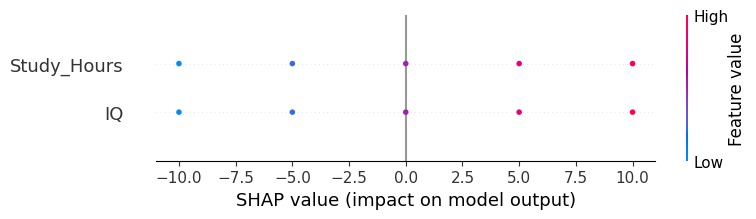

Row 1: Underpredicted — IQ contributed 5.00 and Study Hours contributed 10.00 to change from baseline 80.00.
Row 2: Overpredicted — IQ contributed 10.00 and Study Hours contributed 5.00 to change from baseline 80.00.
Row 3: Exact prediction — IQ contributed 0.00 and Study Hours contributed 0.00 to change from baseline 80.00.
Row 4: Underpredicted — IQ contributed -5.00 and Study Hours contributed -10.00 to change from baseline 80.00.
Row 5: Overpredicted — IQ contributed -10.00 and Study Hours contributed -5.00 to change from baseline 80.00.


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
data = {
    'IQ': [110, 120, 100, 90, 80],
    'Study_Hours': [40, 30, 20, 0, 10],
    'Test_Score': [100, 90, 80, 70, 60]
}
df_original = pd.DataFrame(data)
df_original.to_excel("StudyBoost.xlsx", index=False)
df = pd.read_excel("StudyBoost.xlsx")

#  Fit Multiple Linear Regression
X = df[['IQ', 'Study_Hours']]
y = df['Test_Score']
model = LinearRegression()
model.fit(X, y)

# Model coefficients
coef_iq, coef_hours = model.coef_
intercept = model.intercept_
print(f"Regression Equation: y = {intercept:.2f} + ({coef_iq:.2f} * IQ) + ({coef_hours:.2f} * Study Hours)")

#  Baseline value (mean test score)
baseline = y.mean()
print(f"Baseline (mean Test Score): {baseline:.2f}")

#  Predictions
df['Predicted'] = model.predict(X)

#  SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
df['SHAP_IQ'] = shap_values.values[:, 0]
df['SHAP_StudyHours'] = shap_values.values[:, 1]
df['SHAP_Total'] = df['SHAP_IQ'] + df['SHAP_StudyHours']
df['Baseline + SHAP'] = baseline + df['SHAP_Total']

#  Verify equation
df['Check'] = np.isclose(df['Predicted'], df['Baseline + SHAP'])

#  Display results
print("\nResults Table:")
print(df)

#  SHAP Visualization
shap.summary_plot(shap_values.values, X, feature_names=X.columns)
plt.show()

#  Interpretation
for i, row in df.iterrows():
    if row['Predicted'] > row['Test_Score']:
        status = "Overpredicted"
    elif row['Predicted'] < row['Test_Score']:
        status = "Underpredicted"
    else:
        status = "Exact prediction"
    print(
        f"Row {i+1}: {status} — IQ contributed {row['SHAP_IQ']:.2f} and Study Hours contributed {row['SHAP_StudyHours']:.2f} "
        f"to change from baseline {baseline:.2f}."
    )


**Q3 Diabetes Dataset- Multiple Linear**
 **Regression + SHAP**

Regression Equation:
y = 152.13 + (-10.01 * age) + (-239.82 * sex) + (519.85 * bmi) + (324.38 * bp) + (-792.18 * s1) + (476.74 * s2) + (101.04 * s3) + (177.06 * s4) + (751.27 * s5) + (67.63 * s6)

Baseline (mean Disease Progression): 152.13

Results Table (first 10 rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953 

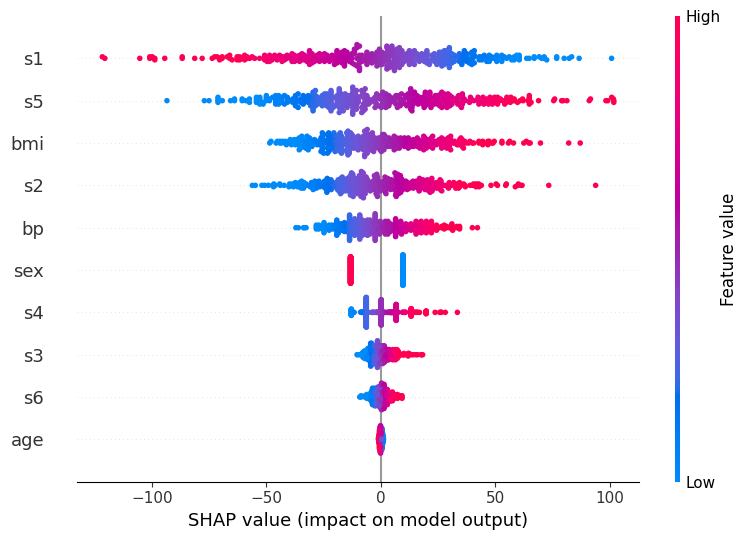

Row 1: Overpredicted — Feature contributions:
   age: -0.39
   sex: -13.26
   bmi: 30.42
   bp: 6.40
   s1: 35.30
   s2: -17.65
   s3: -4.50
   s4: 0.12
   s5: 16.25
   s6: -1.15

Row 2: Underpredicted — Feature contributions:
   age: 0.01
   sex: 9.60
   bmi: -28.41
   bp: -9.24
   s1: 6.97
   s2: -10.18
   s3: 7.41
   s4: -6.42
   s5: -50.04
   s6: -6.20

Row 3: Overpredicted — Feature contributions:
   age: -0.86
   sex: -13.26
   bmi: 21.46
   bp: -2.54
   s1: 36.39
   s2: -17.35
   s3: -3.38
   s4: 0.12
   s5: 3.44
   s6: -1.71

Row 4: Underpredicted — Feature contributions:
   age: 0.88
   sex: 9.60
   bmi: -7.68
   bp: -12.59
   s1: -9.38
   s2: 10.87
   s3: -3.75
   s4: 6.65
   s5: 18.34
   s6: -0.59

Row 5: Underpredicted — Feature contributions:
   age: -0.06
   sex: 9.60
   bmi: -20.56
   bp: 6.40
   s1: -2.84
   s2: 6.39
   s3: 0.71
   s4: 0.12
   s5: -22.74
   s6: -3.11



In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

diabetes = load_diabetes()
X_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_df = pd.Series(diabetes.target, name='Disease_Progression')

df_original = pd.concat([X_df, y_df], axis=1)
df_original.to_excel("Diabetes.xlsx", index=False)
df = pd.read_excel("Diabetes.xlsx")
X = df[diabetes.feature_names]
y = df['Disease_Progression']

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Model coefficients
coef_dict = dict(zip(diabetes.feature_names, model.coef_))
print("Regression Equation:")
print(f"y = {model.intercept_:.2f} + " + " + ".join([f"({v:.2f} * {k})" for k, v in coef_dict.items()]))

# Baseline value
baseline = y.mean()
print(f"\nBaseline (mean Disease Progression): {baseline:.2f}")

# Predictions
df['Predicted'] = model.predict(X)

# SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Add SHAP values for each feature
for i, feature in enumerate(X.columns):
    df[f"SHAP_{feature}"] = shap_values.values[:, i]

# Total SHAP
df['SHAP_Total'] = df[[f"SHAP_{f}" for f in X.columns]].sum(axis=1)
df['Baseline + SHAP'] = baseline + df['SHAP_Total']

# Verify equation
df['Check'] = np.isclose(df['Predicted'], df['Baseline + SHAP'])

# Display first few results
print("\nResults Table (first 10 rows):")
print(df.head(10))

# SHAP Visualization
shap.summary_plot(shap_values.values, X, feature_names=X.columns)
plt.show()

# Interpretation for first few rows
for i, row in df.head(5).iterrows():
    over_under = "Overpredicted" if row['Predicted'] > row['Disease_Progression'] else "Underpredicted"
    print(f"Row {i+1}: {over_under} — Feature contributions:")
    for feature in X.columns:
        print(f"   {feature}: {row[f'SHAP_{feature}']:.2f}")
    print()


**# Q4 - Student Performance Dataset – Multiple Linear Regression + SHAP**

Regression Equation:
y = 58.97 + (5.05 * Study_Time) + (2.42 * Parental_Education) + (-1.00 * Absences)

Baseline (mean Final Exam Score): 77.50

Results Table:
   Study_Time  Parental_Education  Absences  Final_Exam_Score  Predicted  \
0           2                   3         2                75  74.348694   
1           3                   4         0                85  83.818740   
2           5                   2         3                90  86.070661   
3           1                   1        10                60  56.463134   
4           4                   5         1                95  90.293395   
5           2                   3         4                70  72.351767   
6           3                   2         6                65  72.978495   
7           5                   4         0                92  93.915515   
8           4                   5         1                88  90.293395   
9           1                   1        12                55  54.466206   

  

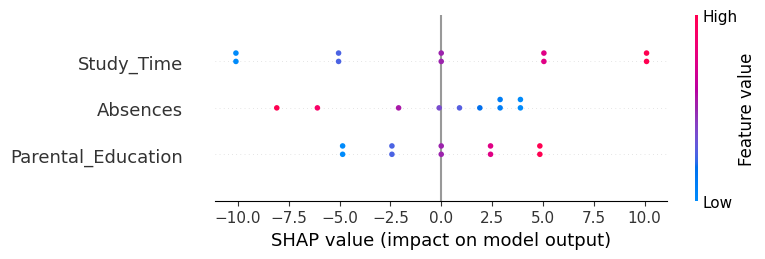

Row 1: Underpredicted — Contributions:
   Study_Time: -5.05
   Parental_Education: 0.00
   Absences: 1.90

Row 2: Underpredicted — Contributions:
   Study_Time: 0.00
   Parental_Education: 2.42
   Absences: 3.89

Row 3: Underpredicted — Contributions:
   Study_Time: 10.10
   Parental_Education: -2.42
   Absences: 0.90

Row 4: Underpredicted — Contributions:
   Study_Time: -10.10
   Parental_Education: -4.85
   Absences: -6.09

Row 5: Underpredicted — Contributions:
   Study_Time: 5.05
   Parental_Education: 4.85
   Absences: 2.90

Row 6: Overpredicted — Contributions:
   Study_Time: -5.05
   Parental_Education: 0.00
   Absences: -0.10

Row 7: Overpredicted — Contributions:
   Study_Time: 0.00
   Parental_Education: -2.42
   Absences: -2.10

Row 8: Overpredicted — Contributions:
   Study_Time: 10.10
   Parental_Education: 2.42
   Absences: 3.89

Row 9: Overpredicted — Contributions:
   Study_Time: 5.05
   Parental_Education: 4.85
   Absences: 2.90

Row 10: Underpredicted — Contributions

In [6]:
# Q4 - Student Performance Dataset – Multiple Linear Regression + SHAP

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

# 1️⃣ Create sample dataset (replace with real data if available)
data = {
    'Study_Time': [2, 3, 5, 1, 4, 2, 3, 5, 4, 1],   # hours per day
    'Parental_Education': [3, 4, 2, 1, 5, 3, 2, 4, 5, 1],  # 1=low, 5=high
    'Absences': [2, 0, 3, 10, 1, 4, 6, 0, 1, 12],   # number of absences
    'Final_Exam_Score': [75, 85, 90, 60, 95, 70, 65, 92, 88, 55]
}
df_original = pd.DataFrame(data)
df_original.to_excel("StudentPerformance.xlsx", index=False)
df = pd.read_excel("StudentPerformance.xlsx")
X = df[['Study_Time', 'Parental_Education', 'Absences']]
y = df['Final_Exam_Score']

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Model coefficients
coef_dict = dict(zip(X.columns, model.coef_))
print("Regression Equation:")
print(f"y = {model.intercept_:.2f} + " + " + ".join([f"({v:.2f} * {k})" for k, v in coef_dict.items()]))

# Baseline value
baseline = y.mean()
print(f"\nBaseline (mean Final Exam Score): {baseline:.2f}")

df['Predicted'] = model.predict(X)

# SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Add SHAP values for each feature
for i, feature in enumerate(X.columns):
    df[f"SHAP_{feature}"] = shap_values.values[:, i]

# Total SHAP
df['SHAP_Total'] = df[[f"SHAP_{f}" for f in X.columns]].sum(axis=1)
df['Baseline + SHAP'] = baseline + df['SHAP_Total']

# Verify equation
df['Check'] = np.isclose(df['Predicted'], df['Baseline + SHAP'])

# results
print("\nResults Table:")
print(df)

# SHAP Visualization
shap.summary_plot(shap_values.values, X, feature_names=X.columns)
plt.show()

# Interpretation
for i, row in df.iterrows():
    over_under = "Overpredicted" if row['Predicted'] > row['Final_Exam_Score'] else "Underpredicted"
    print(f"Row {i+1}: {over_under} — Contributions:")
    for feature in X.columns:
        print(f"   {feature}: {row[f'SHAP_{feature}']:.2f}")
    print()
